# Chapter 1 - EDA
Data Source: 
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

In [1]:
import pandas as pd

In [2]:
medal_count = pd.read_excel("data\\Medals.xlsx")

C:\Users\Jackson\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medal_count["Total"].mean()

11.612903225806452

In [4]:
import numpy as np

In [5]:
np.average(medal_count["Gold"],weights=medal_count["Total"])

14.743518518518519

In [6]:
from scipy.stats import trim_mean
trim_mean(medal_count["Gold"],0.1)

1.96

In [7]:
medal_count["Total"].median()

4.0

In [8]:
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

In [9]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [10]:
from statistics import variance
variance(medal_count["Gold"])

49.315100514259

In [11]:
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

In [12]:
from numpy import mean, absolute
mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228485

In [13]:
from numpy import median, absolute
median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [14]:
medal_count["Gold"]

0     39
1     38
2     27
3     22
4     20
      ..
88     0
89     0
90     0
91     0
92     0
Name: Gold, Length: 93, dtype: int64

In [15]:
import numpy as np

q3,q1 = np.percentile(medal_count["Gold"],[75,25])
iqr = q3-q1
iqr

3.0

# Boxplot

<AxesSubplot:>

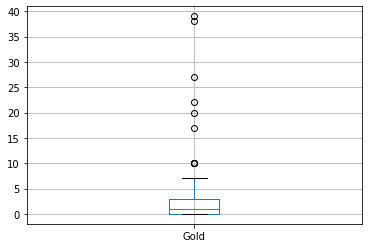

In [16]:
medal_count.boxplot(column="Gold", by=None, ax=None)

In [17]:
pd.cut(medal_count["Gold"],10)

0      (35.1, 39.0]
1      (35.1, 39.0]
2      (23.4, 27.3]
3      (19.5, 23.4]
4      (19.5, 23.4]
          ...      
88    (-0.039, 3.9]
89    (-0.039, 3.9]
90    (-0.039, 3.9]
91    (-0.039, 3.9]
92    (-0.039, 3.9]
Name: Gold, Length: 93, dtype: category
Categories (10, interval[float64]): [(-0.039, 3.9] < (3.9, 7.8] < (7.8, 11.7] < (11.7, 15.6] ... (23.4, 27.3] < (27.3, 31.2] < (31.2, 35.1] < (35.1, 39.0]]

In [18]:
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count()

freq
(-0.039, 3.9]    72
(3.9, 7.8]       11
(7.8, 11.7]       4
(11.7, 15.6]      0
(15.6, 19.5]      1
(19.5, 23.4]      2
(23.4, 27.3]      1
(27.3, 31.2]      0
(31.2, 35.1]      0
(35.1, 39.0]      2
Name: Rank, dtype: int64

In [19]:
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


# Histogram

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

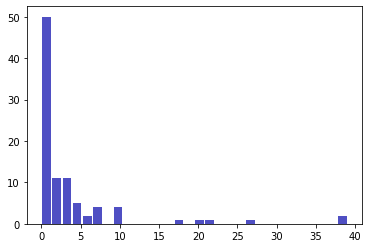

In [20]:
import matplotlib.pyplot as plt

plt.hist(x=medal_count["Gold"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

# Density Plot

<AxesSubplot:ylabel='Density'>

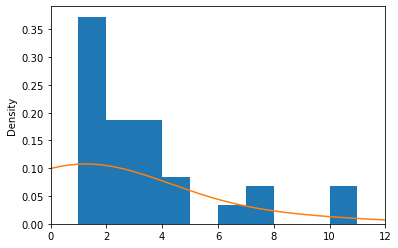

In [21]:
ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)

# Exploring Binary and Categorical Data

In [22]:
# Mode
medal_count["Gold"].mode()

0    0
dtype: int64

# Bar chart

Text(0, 0.5, 'Country')

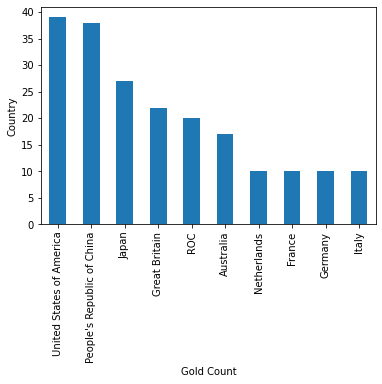

In [27]:
ax = medal_count.iloc[:10,:].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

# Pi Chart

([<matplotlib.patches.Wedge at 0x1acdd3cd820>,
 [Text(-0.8185143206633013, 0.7348702653319799, 'United States of America'),
  Text(-0.6617865270208045, -0.878657266887233, "People's Republic of China"),
  Text(0.7523112747552013, -0.8025133929575283, 'Japan'),
  Text(1.0693300439157463, 0.257940414009027, 'Great Britain'),
  Text(0.4589130532667276, 0.9996993595783733, 'ROC')],
 [Text(-0.44646235672543705, 0.40083832654471624, '26.7%'),
  Text(-0.3609744692840752, -0.47926760012030883, '26.0%'),
  Text(0.4103516044119279, -0.43773457797683357, '18.5%'),
  Text(0.5832709330449525, 0.1406947712776511, '15.1%'),
  Text(0.2503162108727605, 0.5452905597700217, '13.7%')])

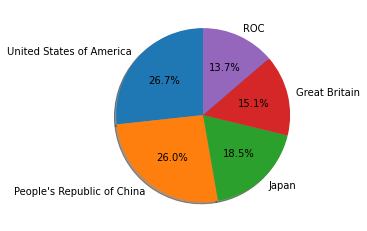

In [32]:
pie_data = medal_count.iloc[:5,:]

plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%',
shadow=True, startangle=90)

# Correlation

In [33]:
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


# Scatter Plot

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

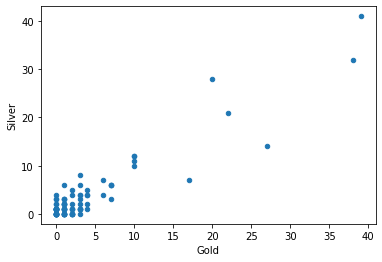

In [34]:
medal_count.plot.scatter(x="Gold", y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

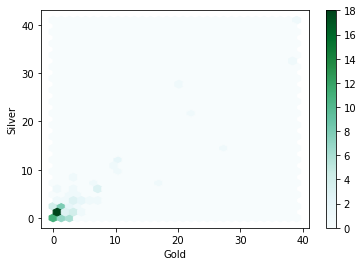

In [36]:
medal_count.plot.hexbin(x="Gold", y="Silver", gridsize=30, sharex=False)

C:\Users\Jackson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


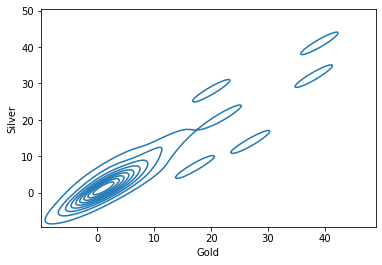

In [39]:
import seaborn as sns

ax= sns.kdeplot(medal_count["Gold"],medal_count["Silver"])

# Heat Map

<AxesSubplot:>

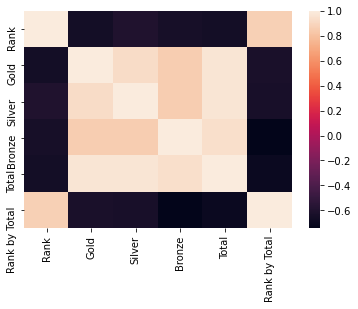

In [40]:
sns.heatmap(medal_count.corr())

# Contigency Table

In [57]:
crosstab = medal_count[["Silver","Gold"]].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x:len(x), margins=True)
crosstab.fillna(0, inplace=False)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Violin Plot

<AxesSubplot:xlabel='Gold'>

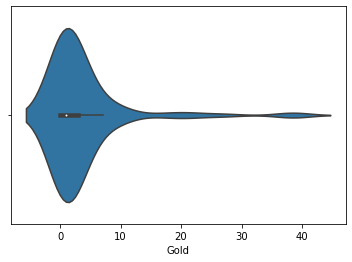

In [59]:
sns.violinplot(x=medal_count["Gold"])